# Predicting Movie Rental Durations

![dvd_image](dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [1]:
import pandas as pd
import numpy as np

# Import train_test_split
from sklearn.model_selection import train_test_split

#import scaling
from sklearn.preprocessing import StandardScaler

#import linera models
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

#import dt models
from sklearn.tree import DecisionTreeRegressor

#import ensamble and xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#import mertic
from sklearn.metrics import mean_squared_error as MSE

# Import matplolibt and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\AHamdan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Exploring Data

In [2]:
#get data
dvd = pd.read_csv('rental_info.csv')

In [3]:
#check first 5 rows of data
dvd.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


In [4]:
#chech data type and nulls
dvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_date       15861 non-null  object 
 1   return_date       15861 non-null  object 
 2   amount            15861 non-null  float64
 3   release_year      15861 non-null  float64
 4   rental_rate       15861 non-null  float64
 5   length            15861 non-null  float64
 6   replacement_cost  15861 non-null  float64
 7   special_features  15861 non-null  object 
 8   NC-17             15861 non-null  int64  
 9   PG                15861 non-null  int64  
 10  PG-13             15861 non-null  int64  
 11  R                 15861 non-null  int64  
 12  amount_2          15861 non-null  float64
 13  length_2          15861 non-null  float64
 14  rental_rate_2     15861 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


In [5]:
#check duplicated rows
dvd[dvd.duplicated()]

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2


In [6]:
#check special features column data
dvd.special_features.value_counts()

special_features
{Trailers,Commentaries,"Behind the Scenes"}                     1308
{Trailers}                                                      1139
{Trailers,Commentaries}                                         1129
{Trailers,"Behind the Scenes"}                                  1122
{"Behind the Scenes"}                                           1108
{Commentaries,"Deleted Scenes","Behind the Scenes"}             1101
{Commentaries}                                                  1089
{Commentaries,"Behind the Scenes"}                              1078
{Trailers,"Deleted Scenes"}                                     1047
{"Deleted Scenes","Behind the Scenes"}                          1035
{"Deleted Scenes"}                                              1023
{Commentaries,"Deleted Scenes"}                                 1011
{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}     983
{Trailers,Commentaries,"Deleted Scenes"}                         916
{Trailers,"Delete

In [7]:
#check amount column data
dvd.amount.value_counts()

amount
4.99     3748
2.99     3501
0.99     2924
5.99     1299
6.99     1119
3.99     1107
7.99      670
1.99      638
8.99      485
9.99      256
10.99     104
11.99      10
Name: count, dtype: int64

# Wrnagling Data

In [8]:
#convert rental_date column from object to datetime
dvd['rental_date'] = pd.to_datetime(dvd['rental_date'])

In [9]:
#convert return_date column from object to datetime
dvd['return_date'] = pd.to_datetime(dvd['return_date'])

In [10]:
#create a column to represent the rental days
dvd['rental_length'] = dvd['return_date']- dvd['rental_date']
dvd['rental_length_days'] = dvd['rental_length'].astype('str').str[0]

In [11]:
#convert the days to int 
dvd['rental_length_days'] = dvd['rental_length_days'].astype(int)

In [12]:
#check
dvd.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length,rental_length_days
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3 days 20:46:00,3
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 20:05:00,2
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7 days 05:44:00,7
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 02:24:00,2
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4 days 01:05:00,4


- Most attractive special features could be Behind the Scenes and Deleted Scenes
- We will create two columns for each feature where 1 represent feature exisiting

In [13]:
dvd['deleted_scenes'] = np.where(dvd['special_features'].str.contains('Deleted Scenes'),1,0 )

In [14]:
dvd['behind_the_scenes'] = np.where(dvd['special_features'].str.contains('Behind the Scenes'),1,0 )

In [15]:
#check
dvd.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length,rental_length_days,deleted_scenes,behind_the_scenes
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3 days 20:46:00,3,0,1
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 20:05:00,2,0,1
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7 days 05:44:00,7,0,1
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 02:24:00,2,0,1
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4 days 01:05:00,4,0,1


In [16]:
dvd.describe()

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length,rental_length_days,deleted_scenes,behind_the_scenes
count,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861,15861.000000,15861.000000,15861.000000
mean,4.217161,2006.885379,2.944101,114.994578,20.224727,0.204842,0.200303,0.223378,0.198726,23.355504,14832.841876,11.389287,5 days 00:36:28.541706071,4.525944,0.497320,0.536347
std,2.360383,2.025027,1.649766,40.114715,6.083784,0.403599,0.400239,0.416523,0.399054,23.503164,9393.431996,10.005293,2 days 14:12:21.733112388,2.635108,0.500009,0.498693
min,0.990000,2004.000000,0.990000,46.000000,9.990000,0.000000,0.000000,0.000000,0.000000,0.980100,2116.000000,0.980100,0 days 18:00:00,0.000000,0.000000,0.000000
25%,2.990000,2005.000000,0.990000,81.000000,14.990000,0.000000,0.000000,0.000000,0.000000,8.940100,6561.000000,0.980100,2 days 20:52:00,2.000000,0.000000,0.000000
50%,3.990000,2007.000000,2.990000,114.000000,20.990000,0.000000,0.000000,0.000000,0.000000,15.920100,12996.000000,8.940100,5 days 00:34:00,5.000000,0.000000,1.000000
75%,4.990000,2009.000000,4.990000,148.000000,25.990000,0.000000,0.000000,0.000000,0.000000,24.900100,21904.000000,24.900100,7 days 03:29:00,7.000000,1.000000,1.000000
max,11.990000,2010.000000,4.990000,185.000000,29.990000,1.000000,1.000000,1.000000,1.000000,143.760100,34225.000000,24.900100,9 days 05:59:00,9.000000,1.000000,1.000000


## Features Selection
- Feature selection shoud be done after scaling
- We will use two methods and compare between them
    - Lasso()
    - Random Forest()

## `A-` Lasso Feature Selection
### `1-` Without scaling

In [17]:
#feature selection
X = dvd.drop(['rental_date', 'return_date', 'special_features', 'rental_length', 'rental_length_days' ], axis = 1)
y = dvd['rental_length_days']

In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=9)

In [19]:
#check most important features using Lasso before scaling
lasso = Lasso(alpha = 0.3)
lasso.fit(X_train, y_train)

Lasso(alpha=0.3)

In [20]:
#check coef which greater than 0
lasso.coef_ >0

array([ True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False])

In [21]:
#get columns with coef > 0
X_train.iloc[:, lasso.coef_ > 0].columns

Index(['amount', 'amount_2', 'length_2'], dtype='object')

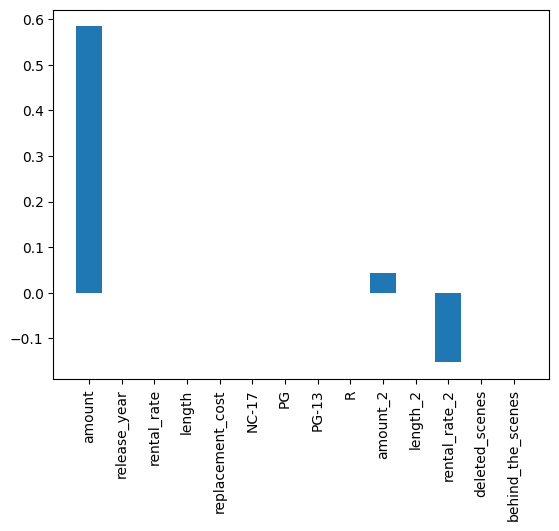

In [22]:
#plot visual for all coef
plt.bar(X.columns, lasso.coef_)
plt.xticks(rotation = 90);

In [23]:
# If you want to select features bases on Lasoo coef without caling
X_lasso_train, X_lasso_test = X_train.iloc[:, lasso.coef_ > 0], X_test.iloc[:, lasso.coef_ > 0]

### `2-` After scaling

In [24]:
#check most important features using Lasso after scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
scaled_lasso = Lasso(alpha = 0.3)
scaled_lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.3)

In [25]:
#get coefficient after scaling
scaled_lasso.coef_

array([ 1.78833765,  0.        , -0.8209491 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.12245781, -0.        ,  0.        ])

In [26]:
 scaled_lasso.coef_ >0

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [27]:
X_train.iloc[:, scaled_lasso.coef_ > 0].columns

Index(['amount'], dtype='object')

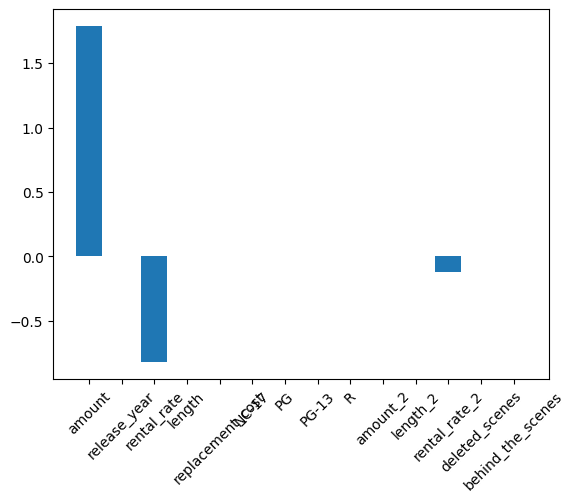

In [28]:
plt.bar(X.columns, scaled_lasso.coef_)
plt.xticks(rotation = 45);

### `B-` Random Forest Feature Selection

No need to scale data at Random Forest as it depend on Decision Tree
- if you run the below code on unscaled and scaled data it will be the same

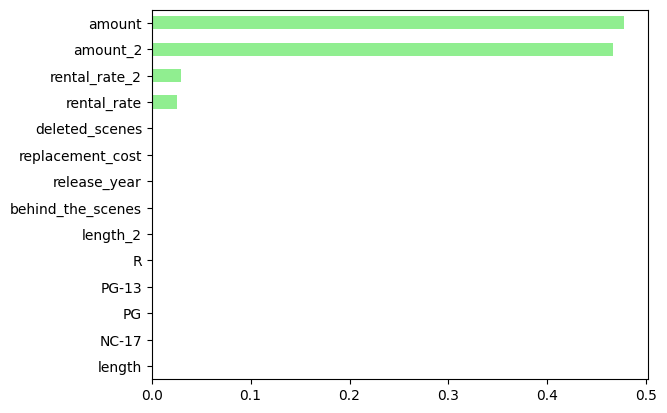

In [29]:
rf = RandomForestRegressor(n_estimators=40,
                           min_samples_leaf=0.12,
                           random_state=9)

rf.fit(X_train, y_train)

# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); 
plt.show()

In [30]:
rf.feature_importances_

array([4.77646495e-01, 3.24479584e-05, 2.55214305e-02, 0.00000000e+00,
       8.43153030e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.66130793e-01, 0.00000000e+00, 2.99812991e-02,
       5.72516613e-04, 3.07031374e-05])

In [31]:
sorted_importances_rf

length               0.000000
NC-17                0.000000
PG                   0.000000
PG-13                0.000000
R                    0.000000
length_2             0.000000
behind_the_scenes    0.000031
release_year         0.000032
replacement_cost     0.000084
deleted_scenes       0.000573
rental_rate          0.025521
rental_rate_2        0.029981
amount_2             0.466131
amount               0.477646
dtype: float64

**i will select features based on RF**

In [32]:
X = dvd[['amount', 'amount_2', 'rental_rate_2', 'rental_rate', 'deleted_scenes', 
           'replacement_cost', 'release_year', 'behind_the_scenes']]
y = dvd['rental_length_days']

# Visualize Data

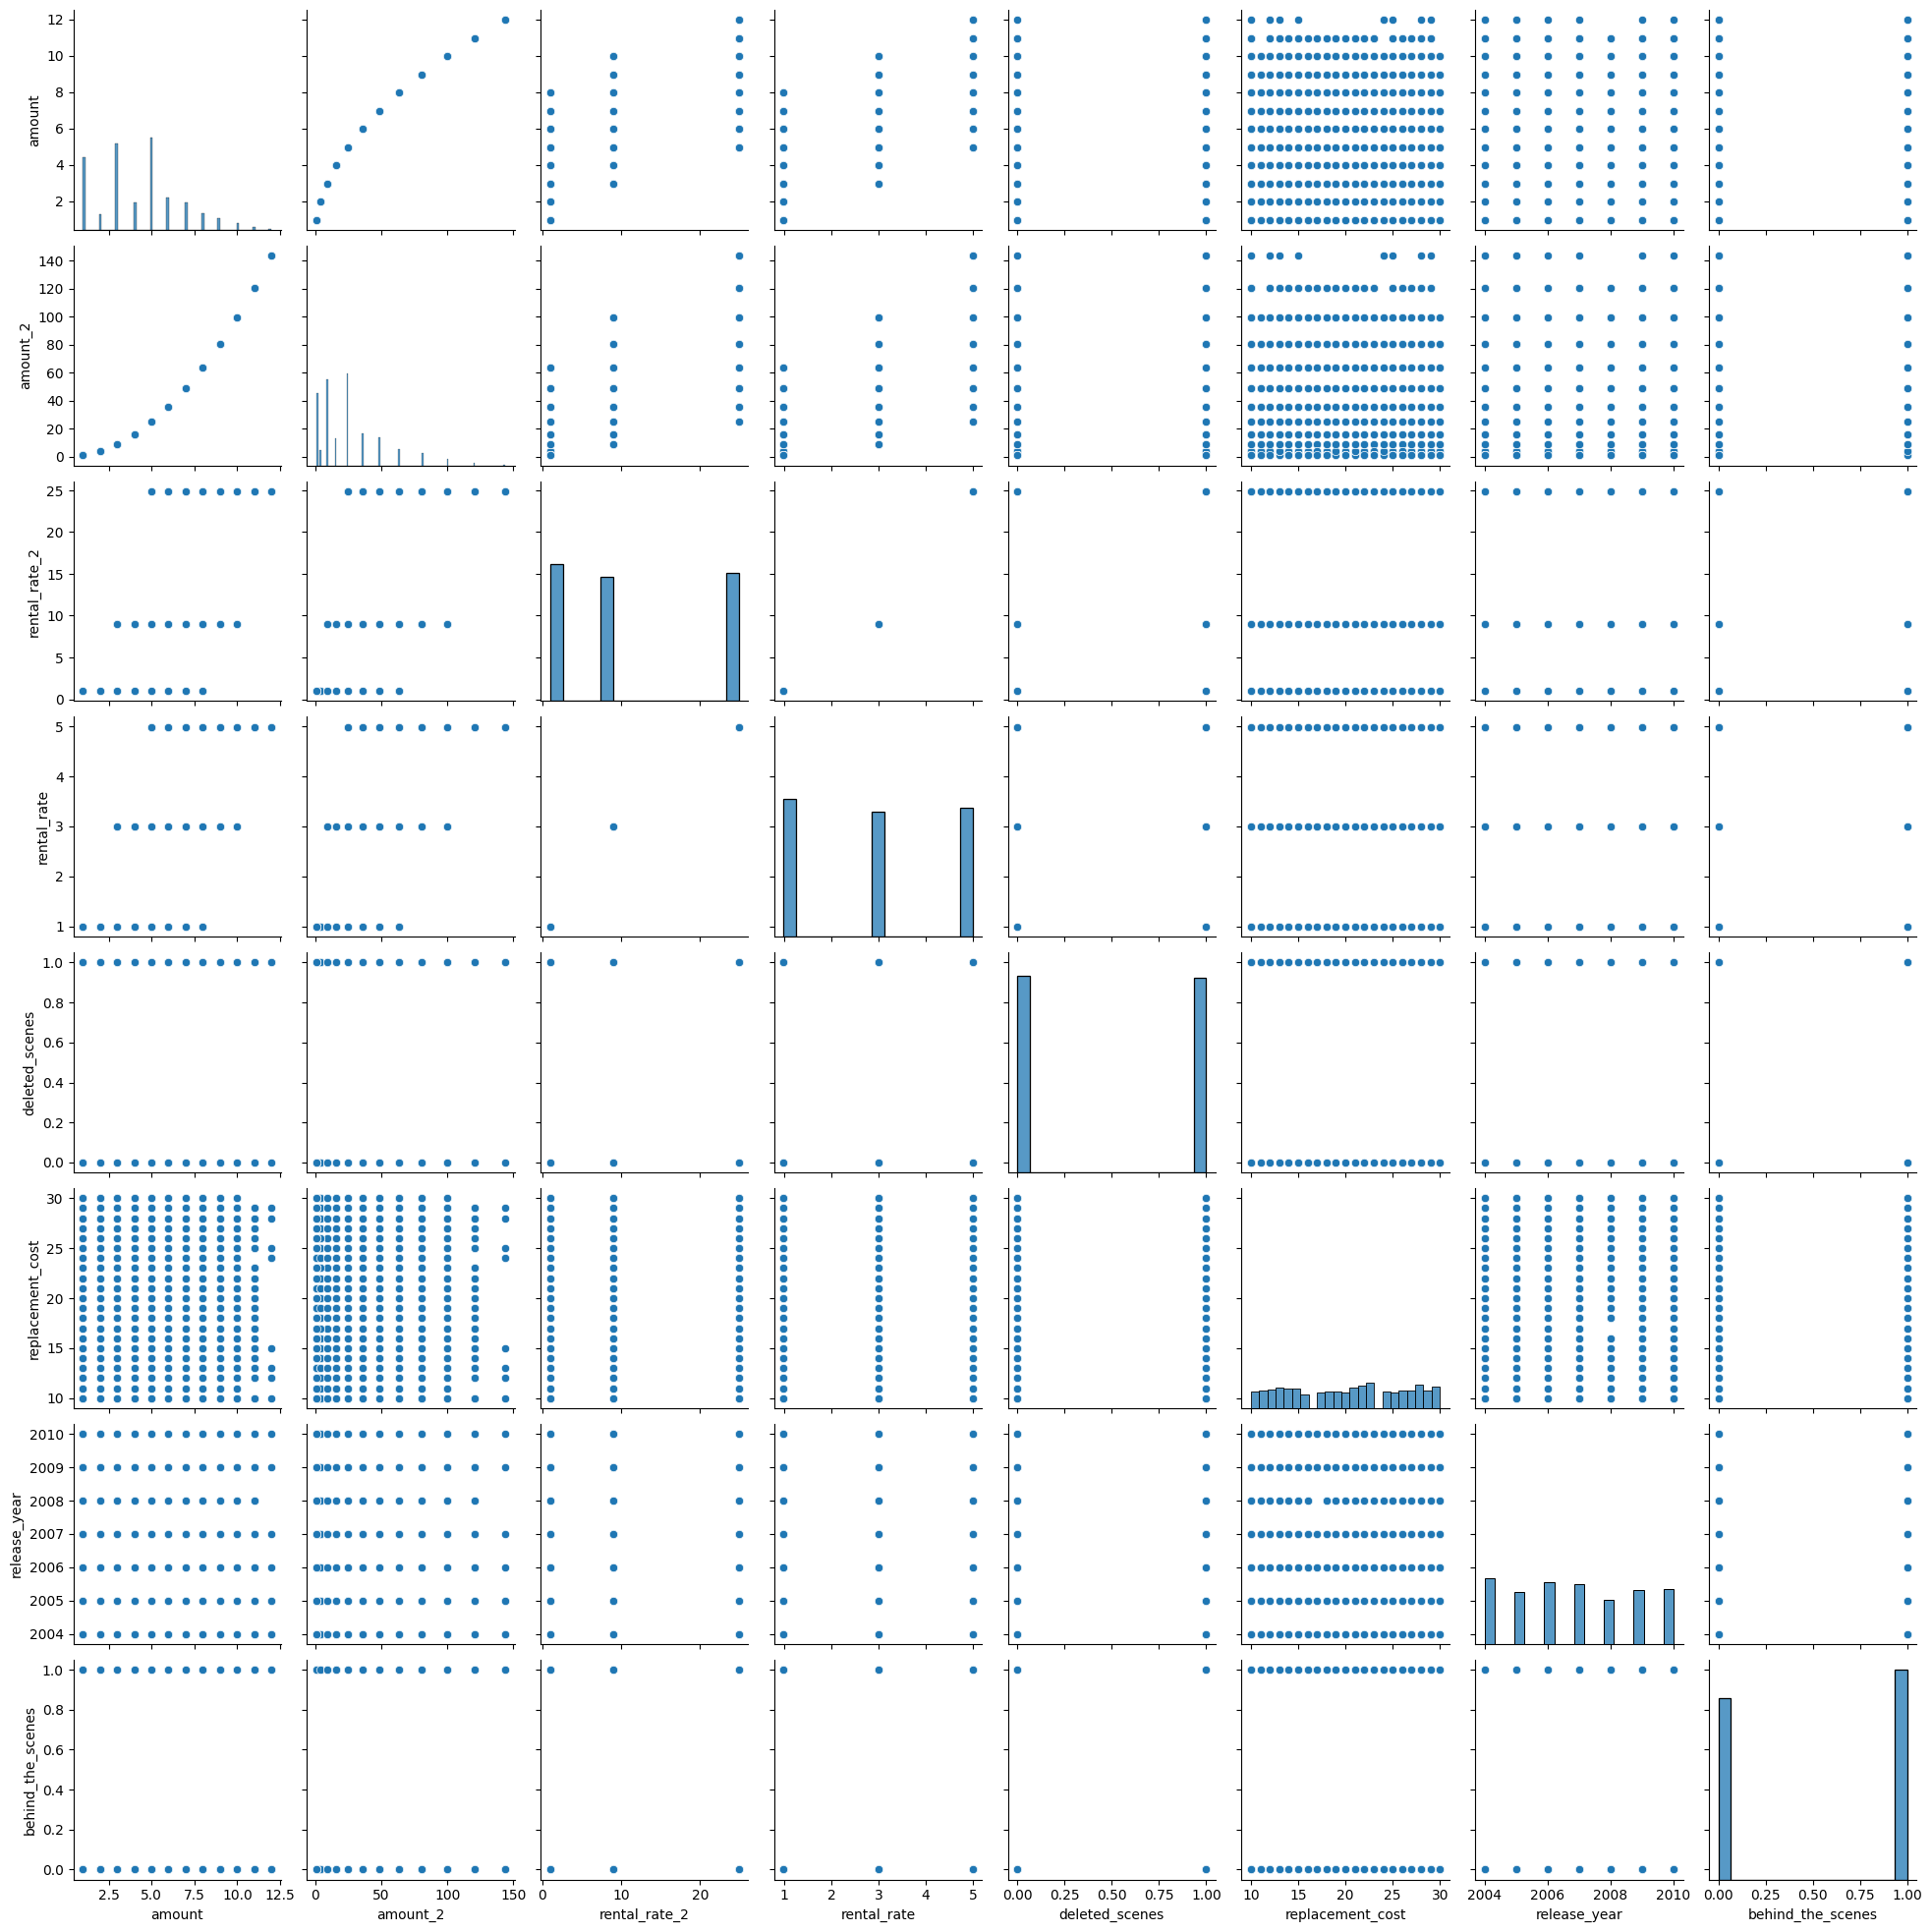

In [33]:
#check if there is high correleation between our features
sns.pairplot(X);

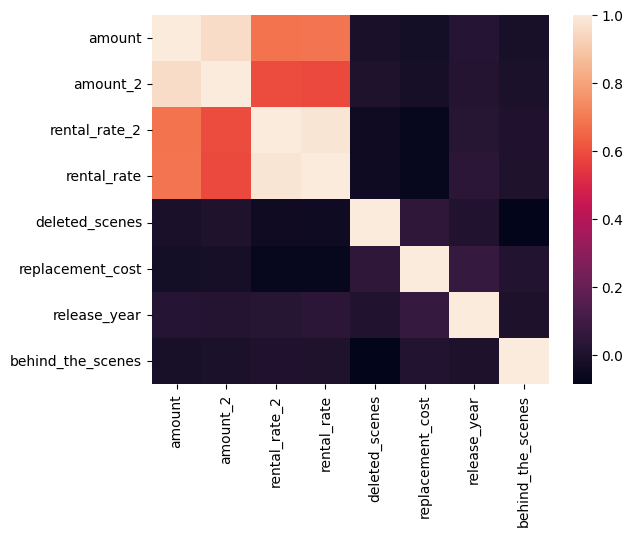

In [34]:
sns.heatmap(X.corr());

# Modeling 

In [35]:
#spliting
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=9)

#scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#create a list to collect all models restlts 
results = []

#### 1- Linear Regression Model

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test_scaled)

In [40]:
lr_mse = MSE(y_test,y_pred)
lr_mse

2.954714795314352

In [41]:
lr_r2 = lr.score(X_test_scaled,y_test)
lr_r2

0.5838178120879753

In [42]:
#create a DataFrame to collect results
results.append({'Model': 'Linear Regression', 'MSE':lr_mse , 'R2':lr_r2 , 'Params':None})

In [43]:
results

[{'Model': 'Linear Regression',
  'MSE': 2.954714795314352,
  'R2': 0.5838178120879753,
  'Params': None}]

#### 2- Lasso Model

In [44]:
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.3)

In [45]:
y_pred = lasso.predict(X_test_scaled)

In [46]:
lasso_mse = MSE(y_test,y_pred)
lasso_mse

3.5826200008677476

In [47]:
lasso_r2 = lasso.score(X_test_scaled, y_test)
lasso_r2

0.4953751093733266

In [50]:
lasso.alpha

0.3

In [51]:
results.append({'Model': 'Lasso Regression', 'MSE':lasso_mse, 'R2':lasso_r2 , 'Params':'alpha = 0.3' })

In [52]:
results

[{'Model': 'Linear Regression',
  'MSE': 2.954714795314352,
  'R2': 0.5838178120879753,
  'Params': None},
 {'Model': 'Lasso Regression',
  'MSE': 3.5826200008677476,
  'R2': 0.4953751093733266,
  'Params': 'alpha = 0.3'}]

### 3- DecisionTreeRegressor

In [53]:
dt = DecisionTreeRegressor(max_depth=50,
                           min_samples_leaf=0.002,
                          random_state = 9)

In [54]:
# Fit 'dt' to the training-set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, min_samples_leaf=0.002, random_state=9)

In [55]:
# Predict test-set labels
y_pred = dt.predict(X_test)
# Compute test-set MSE
dt_mse = round(MSE(y_test, y_pred), 3)
dt_mse

2.516

In [56]:
dt_r2 = round(dt.score(X_test, y_test),3)
dt_r2

0.646

In [57]:
dt_params = dt.get_params()
dt_params

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.002,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 9,
 'splitter': 'best'}

In [58]:
results.append({'Model': 'Decision Tree Regressor', 'MSE':dt_mse, 'R2':dt_r2 , 'Params':dt_params })

## `Question` How to evaluate your model if it overfitted or underfitted
### A- Compare CV MSE, train MSE and desired level of MSE
- Calculate cross validation error for dataset
- If CV MSE is > training MSE error model suffer from high variance.**(Model has overfitting)**
- If CV MSE is roughly equal to the training MSE but much greater than >> the desired error. model suffer from high bias **(Model has underfitting).**

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
mse_cv = - cross_val_score(dt, X_train, y_train, cv = 10,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = -1)

In [61]:
# Predict the labels of training set
y_predict_train = dt.predict(X_train)

# Predict the labels of test set
y_predict_test = dt.predict(X_test)

In [62]:
# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

Train MSE: 2.17
Test MSE: 2.52


### B- Cross-Validation Result:
Use cross-validation techniques, such as k-fold cross-validation, to evaluate the model's performance.
- This will give you a more robust estimate of the model's performance and help identify overfitting or underfitting.
- If the model's performance varies significantly across the folds, it may be a sign of overfitting.
- If the model's performance is consistently poor across the folds, it may be a sign of underfitting.

In [63]:
mse_cv

array([2.52494053, 2.38977448, 2.33309727, 2.28947687, 2.40599979,
       2.31036051, 2.47826981, 2.4307054 , 2.4085637 , 2.29772196])

### C- Bias-Variance Tradeoff:
- Calculate the bias and variance of the decision tree regressor model.
- Bias represents the model's tendency to underfit the data, while variance represents the model's tendency to overfit the data.
- If the model has high bias and low variance, it is likely underfitting.
- If the model has low bias and high variance, it is likely overfitting.

In [64]:
mse_cv.mean()

2.3868910307455753

In [65]:
 np.var(mse_cv)

0.005636193851537136


- **Variance:** The variance in the cross-validation scores is not too high, indicating that the model is not overly sensitive to the specific training/validation splits.
- **Mean:** The mean of the cross-validation scores is around 2.5, which is a reasonably good score, suggesting that the model is not severely underfitting.


Based on the given information, it seems that the model is neither overfitted nor severely underfitted. The performance is reasonably good, indicating that the model has found a good balance between bias and variance, and is likely to generalize well to new, unseen data.

### D- Learning Curves:

In [66]:
from sklearn.model_selection import learning_curve

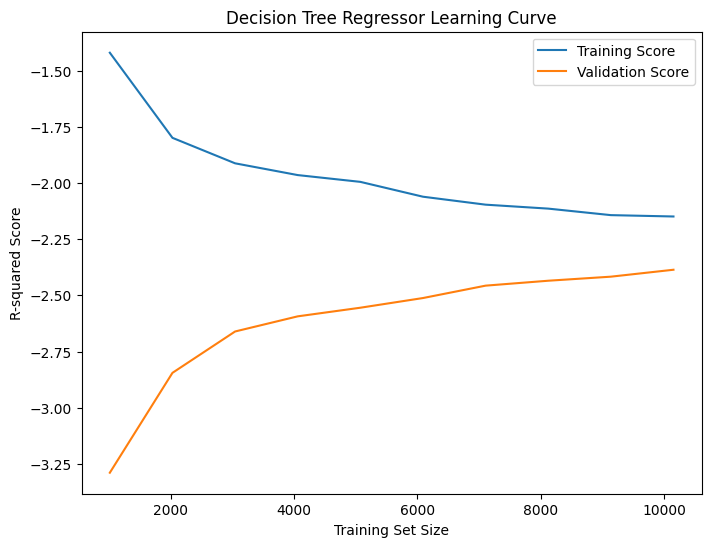

In [67]:
# Generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.title('Decision Tree Regressor Learning Curve')
plt.legend()
plt.show()

- plot the learning curves for the decision tree regressor model, which show the model's performance on the training and validation/test sets as a function of the training set size.
- If the training and validation/test set scores converge as the training set size increases, the model is likely not overfitting.
- If the training score continues to improve while the validation/test score plateaus or decreases, the model is likely overfitting.
- If both the training and validation/test scores are low and do not improve much as the training set size increases, the model is likely underfitting.

### 4- RandomForestRegressor

In [68]:
rf = RandomForestRegressor()

In [69]:
rf = RandomForestRegressor(n_estimators=400,
                           max_depth=50,
                           min_samples_leaf=0.01,
                           random_state=9)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

In [70]:
rf_r2 = rf.score(X_test, y_test)
rf_r2

0.6500717101768957

In [71]:
rf_mse = MSE(y_pred, y_test)
rf_mse

2.4843405731192316

In [72]:
results.append({'Model': 'Random Forest', 'MSE':rf_mse, 'R2':rf_r2 , 'Params':rf.get_params() })

### 5- Gradient Boosting Regressor

In [73]:
sgbt = GradientBoostingRegressor(max_depth=50,
                                 subsample=0.8,# in order for each tree to sample 80% of the data for training
                                 max_features=0.2,# each tree uses 20% of available features to perform the best-split
                                  min_samples_leaf=0.01,
                                 n_estimators=300,
                                 random_state=9)

# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)

# Predict the test set labels
sgbt_y_pred = sgbt.predict(X_test)


In [74]:
sgbt_r2 = sgbt.score(X_test, y_test)
sgbt_r2

0.6736151583816502

In [75]:
sgbt_mse = MSE(y_test, sgbt_y_pred)
sgbt_mse

2.31719220213222

In [76]:
results.append({'Model': 'Gradient Boosting Regressor', 'MSE':sgbt_mse, 'R2':sgbt_r2 , 'Params':sgbt.get_params() })

In [77]:
results_df = pd.DataFrame(results, columns = ['Model', 'MSE', 'R2', 'Params'])
results_df

,Model,MSE,R2,Params
0,Linear Regression,2.954715,0.583818,None
1,Lasso Regression,3.582620,0.495375,alpha = 0.3
2,Decision Tree Regressor,2.516000,0.646000,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
3,Random Forest,2.484341,0.650072,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
4,Gradient Boosting Regressor,2.317192,0.673615,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."


**Gradient Boosting Regressor is the best model with lowest MSE and highest R2**

**Let's check if it overfitted or not**

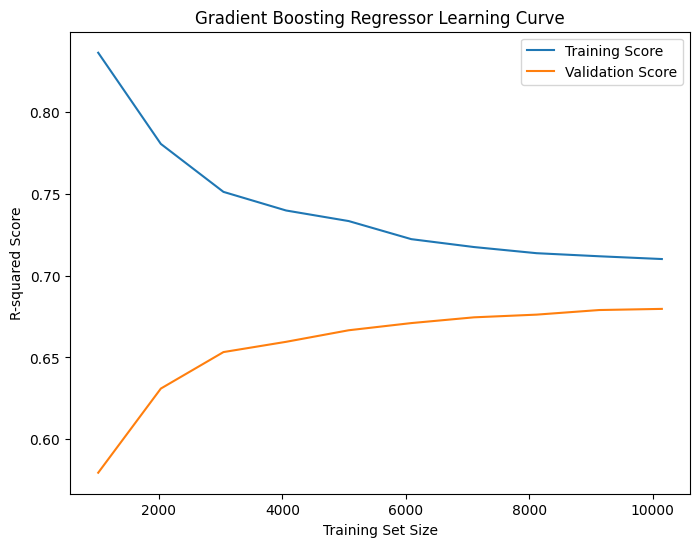

In [78]:
# Generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    sgbt, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.title('Gradient Boosting Regressor Learning Curve')
plt.legend()
plt.show()

### Now last action can be done is tuning hyperparameters To obtain a better performance 

#### `1-` Tuning Decision Tree

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
dt = DecisionTreeRegressor()
params_dt = {'max_depth': np.arange(5,101,5),
            'min_samples_leaf': [0.5, 0.2, 0.1, 0.08, 0.05, 0.01],
            'max_features': [0.2, 0.4,0.6, 0.8]
            }


In [81]:
#Metrics for Evualation:

scoring = {'r2': 'r2',
           'MSE': 'neg_mean_squared_error',
           }

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring= scoring,
                       refit='MSE',
                       return_train_score=True,
                       cv=10,
                       n_jobs=-1)

In [82]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.5, 0.2, 0.1, 0.08, 0.05, 0.01]},
             refit='MSE', return_train_score=True,
             scoring={'MSE': 'neg_mean_squared_error', 'r2': 'r2'})

In [83]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 55, 'max_features': 0.8, 'min_samples_leaf': 0.01}


In [84]:
# Extract best CV score from 'grid_dt'
best_CV_score = -grid_dt.best_score_
print('Best CV accuracy:{:.03}'.format(best_CV_score))

Best CV accuracy:2.4


In [85]:
grid_dt.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'params', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2', 'split5_test_r2', 'split6_test_r2', 'split7_test_r2', 'split8_test_r2', 'split9_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2', 'split0_train_r2', 'split1_train_r2', 'split2_train_r2', 'split3_train_r2', 'split4_train_r2', 'split5_train_r2', 'split6_train_r2', 'split7_train_r2', 'split8_train_r2', 'split9_train_r2', 'mean_train_r2', 'std_train_r2', 'split0_test_MSE', 'split1_test_MSE', 'split2_test_MSE', 'split3_test_MSE', 'split4_test_MSE', 'split5_test_MSE', 'split6_test_MSE', 'split7_test_MSE', 'split8_test_MSE', 'split9_test_MSE', 'mean_test_MSE', 'std_test_MSE', 'rank_test_MSE', 'split0_train_MSE', 'split1_train_MSE', 'split2_train_MSE', 'split3_train_MSE', 'split4_train_MSE', 'split5_train_MSE', 'split6_train_MSE', 'split7_trai

In [86]:
#best r2 
grid_dt.cv_results_['mean_test_r2'].max()

0.6516937125415495

In [87]:
#best MSE
-grid_dt.cv_results_['mean_test_MSE'].max()

2.4010974877623052

In [88]:
# Extract the best model from 'grid_rf'
dt_best_model = grid_dt.best_estimator_

# Predict the test set labels
y_pred = dt_best_model.predict(X_test)

In [89]:
dt_best_model_mse = round(MSE(y_test, y_pred),3)
dt_best_model_mse

2.505

In [90]:
dt_best_model_r2 = round(dt_best_model.score(X_test, y_test),3)
dt_best_model_r2

0.647

In [91]:
dt_best_model_params = dt_best_model.get_params()
dt_best_model_params

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 55,
 'max_features': 0.8,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.01,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [92]:
results.append({'Model': 'Best Model Decision Tree Regressor Grid Search', 
                'MSE':dt_best_model_mse, 
                'R2':dt_best_model_r2 , 
                'Params':dt_best_model_params })

#### `2-` Tuning Random Forest

In [93]:
rf = RandomForestRegressor()

rf_params = { 'n_estimators': np.arange(1,200, 50),
             'min_samples_leaf': [0.5, 0.2, 0.1, 0.08, 0.05, 0.01],
            'max_features': [0.2, 0.4,0.6, 0.8]           
            }

In [94]:
grid_rf = GridSearchCV(estimator=rf,
                       param_grid = rf_params,
                      scoring = scoring,
                      refit = 'MSE',
                      n_jobs = -1)

In [95]:
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.5, 0.2, 0.1, 0.08, 0.05, 0.01],
                         'n_estimators': array([  1,  51, 101, 151])},
             refit='MSE',
             scoring={'MSE': 'neg_mean_squared_error', 'r2': 'r2'})

In [96]:
grid_rf.best_params_

{'max_features': 0.8, 'min_samples_leaf': 0.01, 'n_estimators': 151}

In [97]:
#max grid rf MSE
-grid_rf.cv_results_['mean_test_MSE'].max()

2.3956270408385483

In [98]:
#max grid rf r2
grid_rf.cv_results_['mean_test_r2'].max()

0.6527270206124399

In [99]:
#get best model
rf_best_model = grid_rf.best_estimator_

#apply best model
y_pred = rf_best_model.predict(X_test)

In [100]:
rf_best_model_r2 = round(rf_best_model.score(X_test, y_test),3)
rf_best_model_r2

0.65

In [101]:
rf_best_model_mse = round(MSE(y_pred, y_test),3)
rf_best_model_mse

2.484

In [102]:
rf_best_model_params = rf_best_model.get_params()
rf_best_model_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.8,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.01,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 151,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [103]:
results.append({'Model': 'Best Model Random Forest Regressor Grid Search', 
                'MSE':rf_best_model_mse, 
                'R2':rf_best_model_r2 , 
                'Params':rf_best_model_params })

#### `3-` Tuning XGBoost 

In [104]:
np.arange(25, 101, 25)

array([ 25,  50,  75, 100])

In [105]:
np.arange(50, 300, 100)

array([ 50, 150, 250])

In [106]:
sgbt = GradientBoostingRegressor()
sgbt_params = {'max_depth' : np.arange(25, 101, 25),
             'subsample' : [0.6,0.8],# in order for each tree to sample 80% of the data for training
             'max_features' : [0.2, 0.3, 0.4],# each tree uses 20% of available features to perform the best-split
              'min_samples_leaf' : [0.1, 0.05, 0.01],
             'n_estimators' : np.arange(50, 300, 100)
              }

In [107]:
grid_sgbt = GridSearchCV(estimator = sgbt,
                        param_grid = sgbt_params,
                        scoring = scoring,
                         refit = 'MSE',
                        return_train_score=True,
                        n_jobs = -1)

In [108]:
grid_sgbt.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 25,  50,  75, 100]),
                         'max_features': [0.2, 0.3, 0.4],
                         'min_samples_leaf': [0.1, 0.05, 0.01],
                         'n_estimators': array([ 50, 150, 250]),
                         'subsample': [0.6, 0.8]},
             refit='MSE', return_train_score=True,
             scoring={'MSE': 'neg_mean_squared_error', 'r2': 'r2'})

In [109]:
grid_sgbt.best_params_

{'max_depth': 75,
 'max_features': 0.4,
 'min_samples_leaf': 0.01,
 'n_estimators': 250,
 'subsample': 0.8}

In [110]:
-grid_sgbt.best_score_

2.147114731731259

In [111]:
grid_sgbt.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_n_estimators', 'param_subsample', 'params', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2', 'split0_train_r2', 'split1_train_r2', 'split2_train_r2', 'split3_train_r2', 'split4_train_r2', 'mean_train_r2', 'std_train_r2', 'split0_test_MSE', 'split1_test_MSE', 'split2_test_MSE', 'split3_test_MSE', 'split4_test_MSE', 'mean_test_MSE', 'std_test_MSE', 'rank_test_MSE', 'split0_train_MSE', 'split1_train_MSE', 'split2_train_MSE', 'split3_train_MSE', 'split4_train_MSE', 'mean_train_MSE', 'std_train_MSE'])

In [112]:
#best r2 score
grid_sgbt.cv_results_['mean_test_r2'].max()

0.6887338051244363

In [113]:
#best MSE
-grid_sgbt.cv_results_['mean_test_MSE'].max()

2.147114731731259

In [114]:
#get best estimator
sgbt_best_model = grid_sgbt.best_estimator_

y_pred = sgbt_best_model.predict(X_test)

In [115]:
sgbt_best_model_r2 = round(sgbt_best_model.score(X_test, y_test),3)
sgbt_best_model_r2

0.681

In [116]:
sgbt_best_model_mse = round(MSE(y_pred, y_test),3)
sgbt_best_model_mse

2.264

In [117]:
sgbt_best_model_params = sgbt_best_model.get_params()
sgbt_best_model_params

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 75,
 'max_features': 0.4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.01,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.8,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [118]:
results.append({'Model': 'Best Model Gradient Boosting Regressor Grid Search', 
                'MSE':sgbt_best_model_mse, 
                'R2':sgbt_best_model_r2 , 
                'Params':sgbt_best_model_params })

In [119]:
results_df = pd.DataFrame(results, columns = ['Model', 'MSE', 'R2', 'Params'])
results_df

,Model,MSE,R2,Params
0,Linear Regression,2.954715,0.583818,None
1,Lasso Regression,3.582620,0.495375,alpha = 0.3
2,Decision Tree Regressor,2.516000,0.646000,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
3,Random Forest,2.484341,0.650072,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
4,Gradient Boosting Regressor,2.317192,0.673615,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."
5,Best Model Decision Tree Regressor Grid Search,2.505000,0.647000,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
6,Best Model Random Forest Regressor Grid Search,2.484000,0.650000,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
7,Best Model Gradient Boosting Regressor Grid Se...,2.264000,0.681000,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."


**Using grid search with Gradient Boosting give us best result**
- Lets check again if it overfitted

**This model shows best reslts, lets test if it overfitted**

In [120]:
mse_cv = - cross_val_score(sgbt_best_model, X_train, y_train, cv = 10,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = -1)

In [121]:
mse_cv

array([2.24321936, 2.17440516, 2.07442221, 2.05409764, 2.17071088,
       2.08752381, 2.28501354, 2.17484583, 2.14664226, 2.05281193])

In [122]:
mse_cv.mean()

2.146369262653313

In [123]:
np.var(mse_cv)

0.0056697882707491525

In [124]:
# Predict the labels of training set
y_predict_train = sgbt_best_model.predict(X_train)

# Predict the labels of test set
y_predict_test = sgbt_best_model.predict(X_test)

In [125]:
# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

Train MSE: 1.94
Test MSE: 2.26


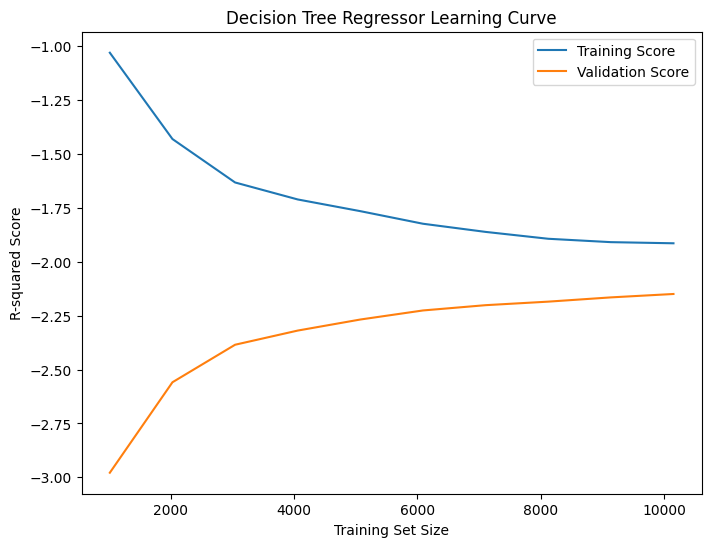

In [126]:
# Generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    sgbt_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.title('Decision Tree Regressor Learning Curve')
plt.legend()
plt.show()

### GridSearchCV VS  RandomizedSearchCV**

 GridSearchCV take alot of time and more computing, so we may use RandomizedSearchCV

In [127]:
from sklearn.model_selection import RandomizedSearchCV

In [128]:
random_sgpbt = RandomizedSearchCV(estimator = sgbt,
                                  param_distributions = sgbt_params,
                                  scoring = scoring,
                                 refit = 'MSE',
                                return_train_score=True,
                                n_jobs = -1
                                  )
                       

In [129]:
random_sgpbt.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 25,  50,  75, 100]),
                                        'max_features': [0.2, 0.3, 0.4],
                                        'min_samples_leaf': [0.1, 0.05, 0.01],
                                        'n_estimators': array([ 50, 150, 250]),
                                        'subsample': [0.6, 0.8]},
                   refit='MSE', return_train_score=True,
                   scoring={'MSE': 'neg_mean_squared_error', 'r2': 'r2'})

In [130]:
random_sgpbt.best_params_

{'subsample': 0.8,
 'n_estimators': 250,
 'min_samples_leaf': 0.01,
 'max_features': 0.4,
 'max_depth': 100}

In [131]:
-random_sgpbt.best_score_

2.1526857865200766

In [132]:
random_sgpbt_best_model = random_sgpbt.best_estimator_

In [133]:
y_pred = random_sgpbt_best_model.predict(X_test)

In [134]:
random_sgpbt_best_model_r2 = round(random_sgpbt_best_model.score(X_test, y_test),3)
random_sgpbt_best_model_r2

0.682

In [135]:
random_sgpbt_best_model_mse = round(MSE(y_pred, y_test),3)
random_sgpbt_best_model_mse

2.261

In [136]:
results.append({'Model': 'Best Model Gradient Boosting Regressor Random Search', 
                'MSE':random_sgpbt_best_model_mse, 
                'R2':random_sgpbt_best_model_r2 , 
                'Params':sgbt_best_model_params })

In [137]:
results_df = pd.DataFrame(results, columns = ['Model', 'MSE', 'R2', 'Params'])
results_df

,Model,MSE,R2,Params
0,Linear Regression,2.954715,0.583818,None
1,Lasso Regression,3.582620,0.495375,alpha = 0.3
2,Decision Tree Regressor,2.516000,0.646000,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
3,Random Forest,2.484341,0.650072,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
4,Gradient Boosting Regressor,2.317192,0.673615,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."
5,Best Model Decision Tree Regressor Grid Search,2.505000,0.647000,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
6,Best Model Random Forest Regressor Grid Search,2.484000,0.650000,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
7,Best Model Gradient Boosting Regressor Grid Se...,2.264000,0.681000,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."
8,Best Model Gradient Boosting Regressor Random ...,2.261000,0.682000,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."


In [138]:
results_df.sort_values('MSE')

,Model,MSE,R2,Params
8,Best Model Gradient Boosting Regressor Random ...,2.261000,0.682000,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."
7,Best Model Gradient Boosting Regressor Grid Se...,2.264000,0.681000,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."
4,Gradient Boosting Regressor,2.317192,0.673615,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."
6,Best Model Random Forest Regressor Grid Search,2.484000,0.650000,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
3,Random Forest,2.484341,0.650072,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
5,Best Model Decision Tree Regressor Grid Search,2.505000,0.647000,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
2,Decision Tree Regressor,2.516000,0.646000,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
0,Linear Regression,2.954715,0.583818,None
1,Lasso Regression,3.582620,0.495375,alpha = 0.3


### Conclusion
- Gradient Boosting Regressor shows best performance as it give the top 3 results
- Using Grid Search CV enhance model results but it use more time and computing resources
- Using Random Search CV shows almost the same result of Grid Search wihout using alot of computing resource and less time